In [1]:
import numpy as np

class PCA():
    # 计算协方差矩阵
    def calc_cov(self, X):
        m = X.shape[0]
        # 数据标准化
        X = (X - np.mean(X, axis=0)) / np.var(X, axis=0)
        return 1 / m * np.matmul(X.T, X)

    def pca(self, X, n_components):
        # 计算协方差矩阵
        cov_matrix = self.calc_cov(X)
        # 计算协方差矩阵的特征值和对应特征向量
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        # 对特征值排序
        idx = eigenvalues.argsort()[::-1]
        # 取最大的前n_component组
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components]
        # Y=PX转换
        return np.matmul(X, eigenvectors)

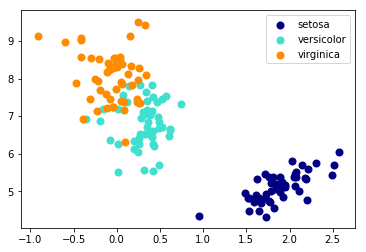

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 导入sklearn数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据降维到3个主成分
X_trans = PCA().pca(X, 3)
# 颜色列表
colors = ['navy', 'turquoise', 'darkorange']

# 绘制不同类别
for c, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1],
            color=c, lw=2, label=target_name)
# 添加图例
plt.legend()
plt.show();

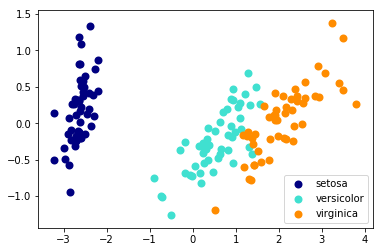

In [6]:
# 导入sklearn降维模块
from sklearn import decomposition
# 创建pca模型实例，主成分个数为3个
pca = decomposition.PCA(n_components=3)
# 模型拟合
pca.fit(X)
# 拟合模型并将模型应用于数据X
X_trans = pca.transform(X)

# 颜色列表
colors = ['navy', 'turquoise', 'darkorange']
# 绘制不同类别
for c, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], 
            color=c, lw=2, label=target_name)
# 添加图例
plt.legend()
plt.show();